## Square

In [1]:
import numpy as np
import matplotlib.pyplot as plt

engression_softplus_results = np.load('simresults_square.npz', allow_pickle=True)
results1 = engression_softplus_results['results1'].item()  
results2 = engression_softplus_results['results2'].item()

engression_softplus_results_L2 = np.load('simresults_square_L2.npz', allow_pickle=True)
results1_L2 = engression_softplus_results_L2['results1'].item()  
results2_L2 = engression_softplus_results_L2['results2'].item()

### Beta Estimate

#### Case 1: Gaussian Error

In [2]:
engression_beta_estimates = results1['weight_estimates']
beta_mean_engression = engression_beta_estimates.mean(axis=0) 

regression_beta_estimates = results1_L2['weight_estimates']
beta_mean_regression = regression_beta_estimates.mean(axis=0) 

print('Engression weight mean estimate:', beta_mean_engression)
print('Regression weight mean estimate:', beta_mean_regression)

beta_var_engression = engression_beta_estimates.var(axis=0) 
beta_var_regression = regression_beta_estimates.var(axis=0) 

print('Engression weight variance estimate:', beta_var_engression)
print('Regression weight variance estimate:', beta_var_regression)

Engression weight mean estimate: [1.        1.2095196 1.5105479]
Regression weight mean estimate: [1.        1.2088375 1.5111735]
Engression weight variance estimate: [0.         0.00113072 0.0013644 ]
Regression weight variance estimate: [0.         0.0005732  0.00057049]


#### Case 2: Uniform Error

In [3]:
engression_beta_estimates = results2['weight_estimates']
beta_mean_engression = engression_beta_estimates.mean(axis=0) 

regression_beta_estimates = results2_L2['weight_estimates']
beta_mean_regression = regression_beta_estimates.mean(axis=0) 

print('Engression weight mean estimate:', beta_mean_engression)
print('Regression weight mean estimate:', beta_mean_regression)

beta_var_engression = engression_beta_estimates.var(axis=0) 
beta_var_regression = regression_beta_estimates.var(axis=0) 

print('Engression weight variance estimate:', beta_var_engression)
print('Regression weight variance estimate:', beta_var_regression)

Engression weight mean estimate: [1.        1.2112608 1.504682 ]
Regression weight mean estimate: [1.        1.2099932 1.511584 ]
Engression weight variance estimate: [0.         0.00113091 0.00105752]
Regression weight variance estimate: [0.         0.00091226 0.00085307]


### Estimate of function $g(\cdot)$, with true $\beta$

#### 1. Gaussian Error

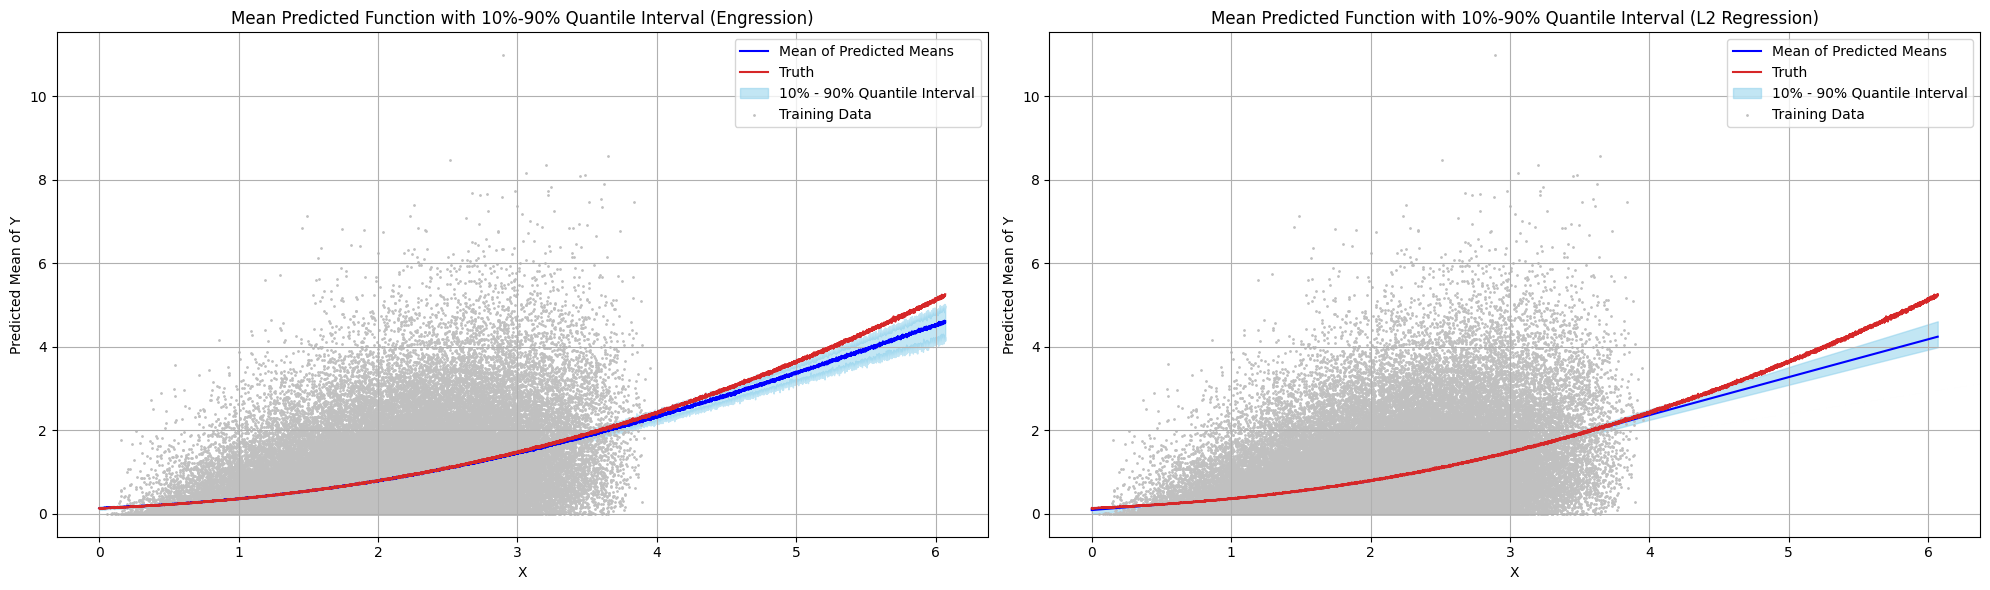

In [4]:
# Access the results
predicted_means = results1['predicted_funs_mean']                            
x_train = results1['x_train']
y_train = results1['y_train']
x_test = results1['x_test']   
y_true_mean = results1['y_true_mean']                       

y_mean = predicted_means.mean(axis=0)  
y_mean_lower = np.quantile(predicted_means, 0.10, axis=0)  
y_mean_upper = np.quantile(predicted_means, 0.90, axis=0)  

x_test = np.squeeze(x_test)  

y_mean = np.squeeze(y_mean)
y_mean_lower = np.squeeze(y_mean_lower)
y_mean_upper = np.squeeze(y_mean_upper)



predicted_means_L2 = results1_L2['predicted_funs']                        
x_train_L2 = results1_L2['x_train']
y_train_L2 = results1_L2['y_train']
x_test_L2 = results1_L2['x_test']   
y_true_mean_L2 = results1_L2['y_true_mean']                        

y_mean_L2 = predicted_means_L2.mean(axis=0)  
y_lower_L2 = np.quantile(predicted_means_L2, 0.10, axis=0)  
y_upper_L2 = np.quantile(predicted_means_L2, 0.90, axis=0)  

x_test_L2 = np.squeeze(x_test_L2)  

y_mean_L2 = np.squeeze(y_mean_L2)
y_lower_L2 = np.squeeze(y_lower_L2)
y_upper_L2 = np.squeeze(y_upper_L2)

fig, axes = plt.subplots(1, 2, figsize=(20, 6))  # Adjust figsize as needed

# First subplot
ax1 = axes[0]
ax1.plot(x_test, y_mean, label='Mean of Predicted Means', color='blue')
ax1.plot(x_test, y_true_mean, label='Truth', color='C3')
ax1.fill_between(x_test, y_mean_lower, y_mean_upper, color='skyblue', alpha=0.5, label='10% - 90% Quantile Interval')
ax1.scatter(x_train, y_train, label="Training Data", s=1, color="silver")
ax1.set_xlabel('X')
ax1.set_ylabel('Predicted Mean of Y')
ax1.set_title('Mean Predicted Function with 10%-90% Quantile Interval (Engression)')
ax1.legend()
ax1.grid(True)

# Second subplot
ax2 = axes[1]
ax2.plot(x_test_L2, y_mean_L2, label='Mean of Predicted Means', color='blue')
ax2.plot(x_test_L2, y_true_mean_L2, label='Truth', color='C3')
ax2.fill_between(x_test_L2, y_lower_L2, y_upper_L2, color='skyblue', alpha=0.5, label='10% - 90% Quantile Interval')
ax2.scatter(x_train_L2, y_train_L2, label="Training Data", s=1, color="silver")
ax2.set_xlabel('X')
ax2.set_ylabel('Predicted Mean of Y')
ax2.set_title('Mean Predicted Function with 10%-90% Quantile Interval (L2 Regression)')
ax2.legend()
ax2.grid(True)

# Adjust layout and display the plots
plt.tight_layout()
plt.show()


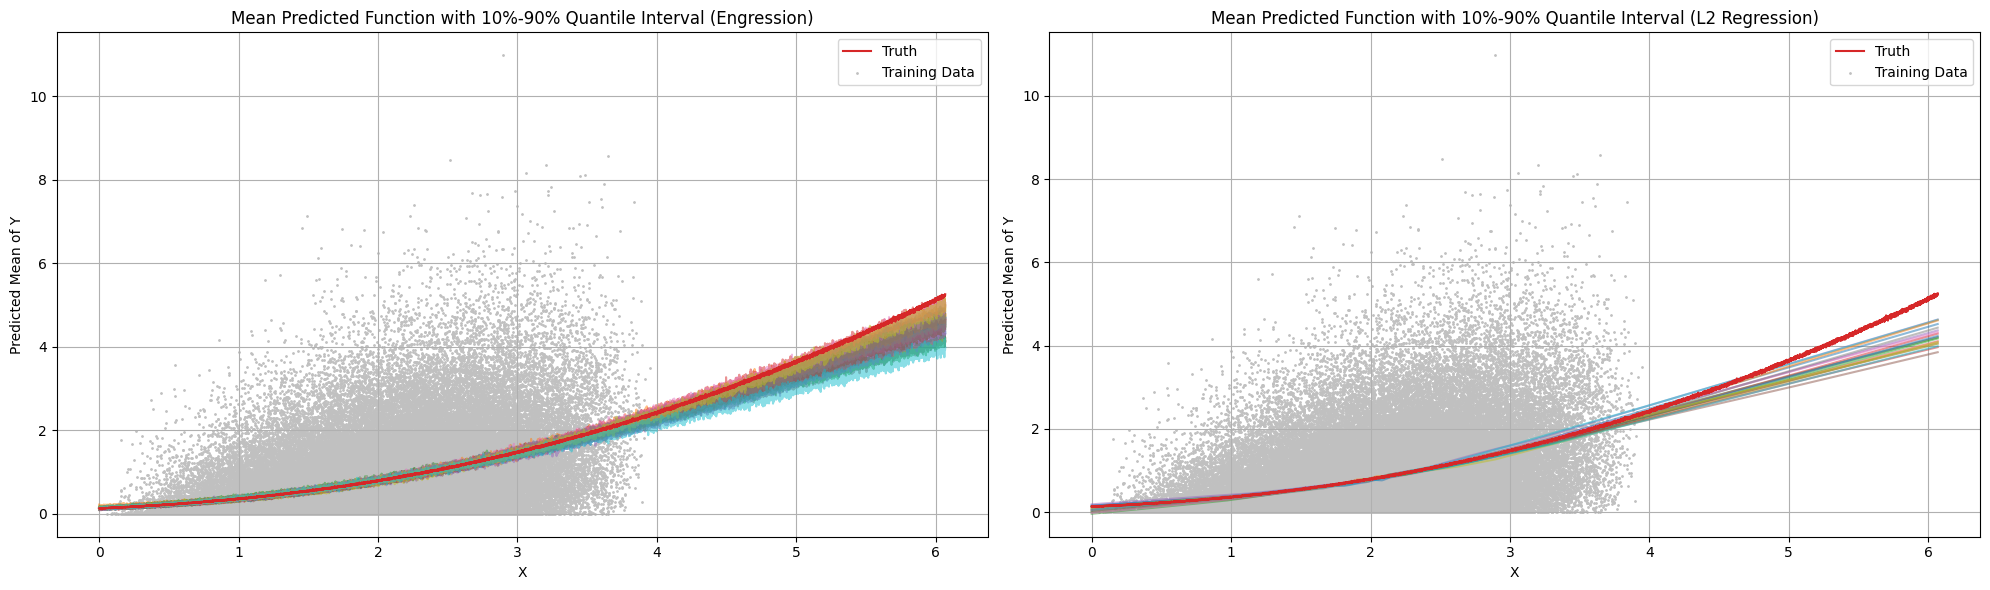

In [5]:
    
fig, axes = plt.subplots(1, 2, figsize=(20, 6))  # Adjust figsize as needed

# First subplot
ax1 = axes[0]
for i in range(20):
    ax1.plot(x_test, predicted_means[i], alpha=0.5)
ax1.plot(x_test, y_true_mean, label='Truth', color='C3')
#ax1.fill_between(x_test, y_mean_lower, y_mean_upper, color='skyblue', alpha=0.5, label='10% - 90% Quantile Interval')
ax1.scatter(x_train, y_train, label="Training Data", s=1, color="silver")
ax1.set_xlabel('X')
ax1.set_ylabel('Predicted Mean of Y')
ax1.set_title('Mean Predicted Function with 10%-90% Quantile Interval (Engression)')
ax1.legend()
ax1.grid(True)

# Second subplot
ax2 = axes[1]
for i in range(20):
    ax2.plot(x_test, predicted_means_L2[i], alpha=0.5)
ax2.plot(x_test_L2, y_true_mean_L2, label='Truth', color='C3')
#ax2.fill_between(x_test_L2, y_lower_L2, y_upper_L2, color='skyblue', alpha=0.5, label='10% - 90% Quantile Interval')
ax2.scatter(x_train_L2, y_train_L2, label="Training Data", s=1, color="silver")
ax2.set_xlabel('X')
ax2.set_ylabel('Predicted Mean of Y')
ax2.set_title('Mean Predicted Function with 10%-90% Quantile Interval (L2 Regression)')
ax2.legend()
ax2.grid(True)

# Adjust layout and display the plots
plt.tight_layout()
plt.show()    

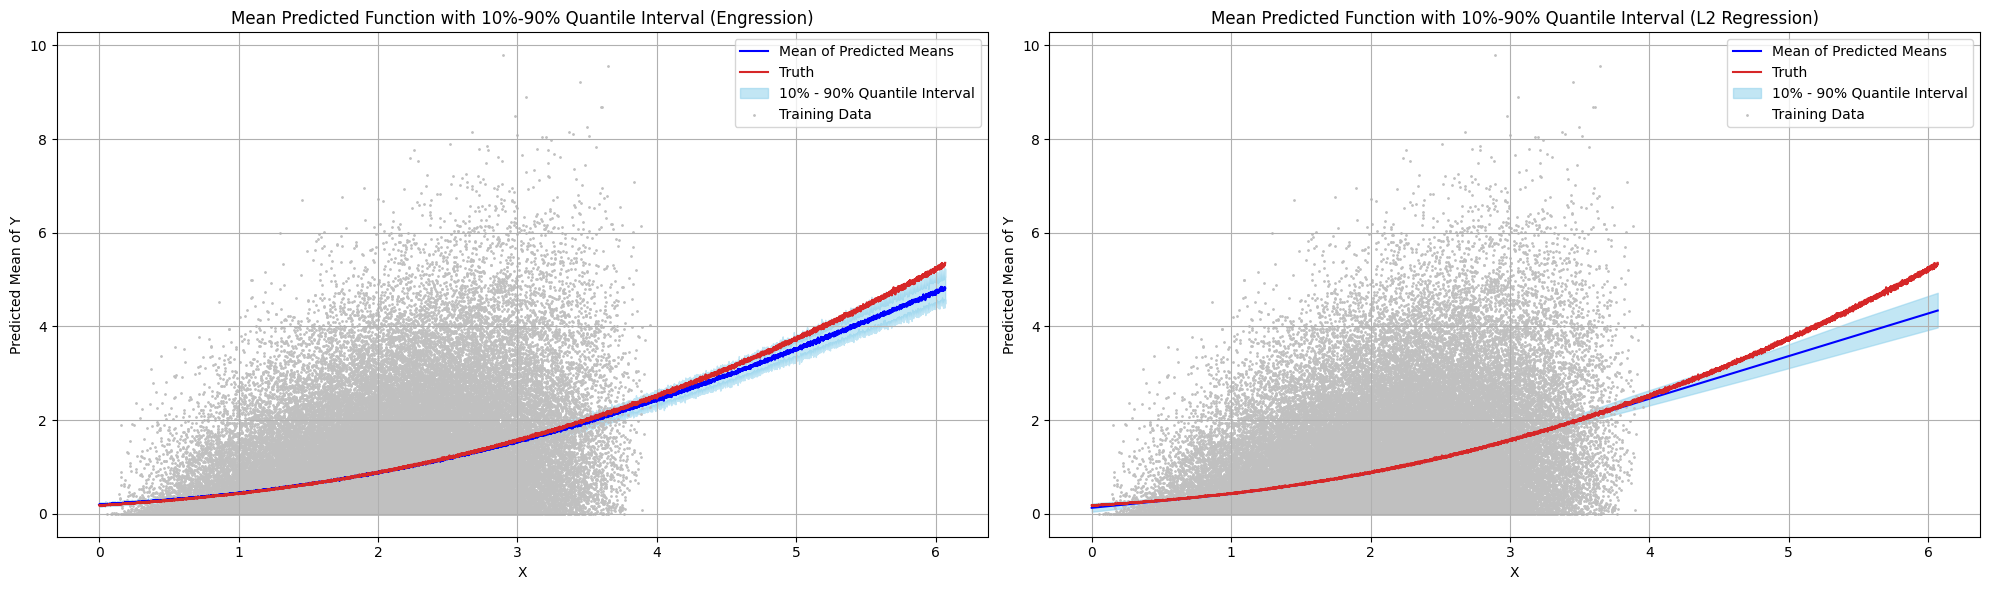

In [6]:
# Access the results
predicted_means = results2['predicted_funs_mean']                            
x_train = results2['x_train']
y_train = results2['y_train']
x_test = results2['x_test']   
y_true_mean = results2['y_true_mean']                       

y_mean = predicted_means.mean(axis=0)  
y_mean_lower = np.quantile(predicted_means, 0.10, axis=0)  
y_mean_upper = np.quantile(predicted_means, 0.90, axis=0)  

x_test = np.squeeze(x_test)  

y_mean = np.squeeze(y_mean)
y_mean_lower = np.squeeze(y_mean_lower)
y_mean_upper = np.squeeze(y_mean_upper)



predicted_means_L2 = results2_L2['predicted_funs']                        
x_train_L2 = results2_L2['x_train']
y_train_L2 = results2_L2['y_train']
x_test_L2 = results2_L2['x_test']   
y_true_mean_L2 = results2_L2['y_true_mean']                        

y_mean_L2 = predicted_means_L2.mean(axis=0)  
y_lower_L2 = np.quantile(predicted_means_L2, 0.10, axis=0)  
y_upper_L2 = np.quantile(predicted_means_L2, 0.90, axis=0)  

x_test_L2 = np.squeeze(x_test_L2)  

y_mean_L2 = np.squeeze(y_mean_L2)
y_lower_L2 = np.squeeze(y_lower_L2)
y_upper_L2 = np.squeeze(y_upper_L2)

fig, axes = plt.subplots(1, 2, figsize=(20, 6))  # Adjust figsize as needed

# First subplot
ax1 = axes[0]
ax1.plot(x_test, y_mean, label='Mean of Predicted Means', color='blue')
ax1.plot(x_test, y_true_mean, label='Truth', color='C3')
ax1.fill_between(x_test, y_mean_lower, y_mean_upper, color='skyblue', alpha=0.5, label='10% - 90% Quantile Interval')
ax1.scatter(x_train, y_train, label="Training Data", s=1, color="silver")
ax1.set_xlabel('X')
ax1.set_ylabel('Predicted Mean of Y')
ax1.set_title('Mean Predicted Function with 10%-90% Quantile Interval (Engression)')
ax1.legend()
ax1.grid(True)

# Second subplot
ax2 = axes[1]
ax2.plot(x_test_L2, y_mean_L2, label='Mean of Predicted Means', color='blue')
ax2.plot(x_test_L2, y_true_mean_L2, label='Truth', color='C3')
ax2.fill_between(x_test_L2, y_lower_L2, y_upper_L2, color='skyblue', alpha=0.5, label='10% - 90% Quantile Interval')
ax2.scatter(x_train_L2, y_train_L2, label="Training Data", s=1, color="silver")
ax2.set_xlabel('X')
ax2.set_ylabel('Predicted Mean of Y')
ax2.set_title('Mean Predicted Function with 10%-90% Quantile Interval (L2 Regression)')
ax2.legend()
ax2.grid(True)

# Adjust layout and display the plots
plt.tight_layout()
plt.show()


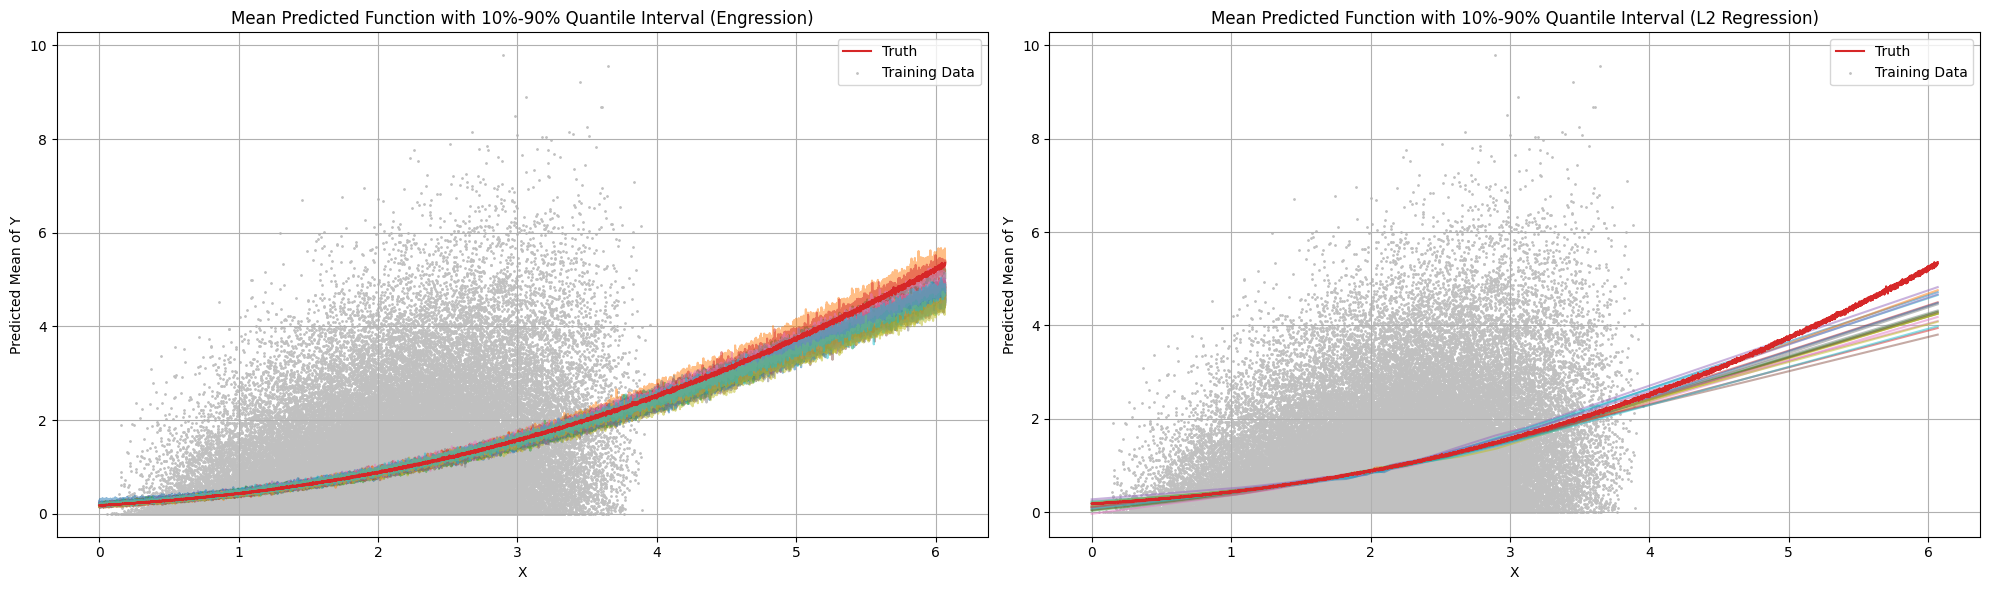

In [7]:
    
fig, axes = plt.subplots(1, 2, figsize=(20, 6))  # Adjust figsize as needed

# First subplot
ax1 = axes[0]
for i in range(20):
    ax1.plot(x_test, predicted_means[i], alpha=0.5)
ax1.plot(x_test, y_true_mean, label='Truth', color='C3')
#ax1.fill_between(x_test, y_mean_lower, y_mean_upper, color='skyblue', alpha=0.5, label='10% - 90% Quantile Interval')
ax1.scatter(x_train, y_train, label="Training Data", s=1, color="silver")
ax1.set_xlabel('X')
ax1.set_ylabel('Predicted Mean of Y')
ax1.set_title('Mean Predicted Function with 10%-90% Quantile Interval (Engression)')
ax1.legend()
ax1.grid(True)

# Second subplot
ax2 = axes[1]
for i in range(20):
    ax2.plot(x_test, predicted_means_L2[i], alpha=0.5)
ax2.plot(x_test_L2, y_true_mean_L2, label='Truth', color='C3')
#ax2.fill_between(x_test_L2, y_lower_L2, y_upper_L2, color='skyblue', alpha=0.5, label='10% - 90% Quantile Interval')
ax2.scatter(x_train_L2, y_train_L2, label="Training Data", s=1, color="silver")
ax2.set_xlabel('X')
ax2.set_ylabel('Predicted Mean of Y')
ax2.set_title('Mean Predicted Function with 10%-90% Quantile Interval (L2 Regression)')
ax2.legend()
ax2.grid(True)

# Adjust layout and display the plots
plt.tight_layout()
plt.show()    

### Estimate of function $g(\cdot)$, with $\hat{\beta}$

#### 1. Gaussian Error

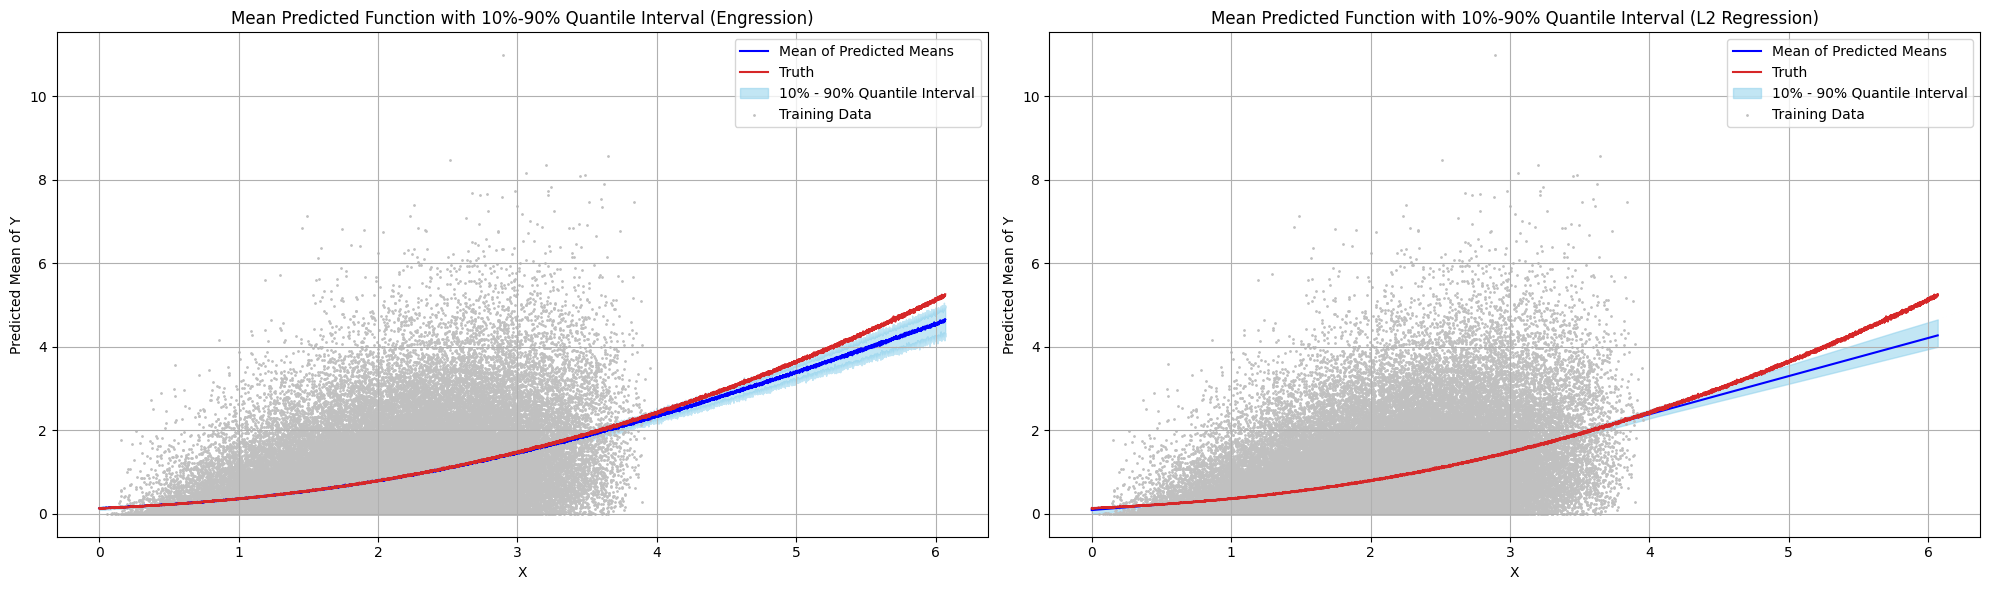

In [8]:
# Access the results
predicted_means = results1['predicted_means']                            
x_train = results1['x_train']
y_train = results1['y_train']
x_test = results1['x_test']   
y_true_mean = results1['y_true_mean']                       

y_mean = predicted_means.mean(axis=0)  
y_mean_lower = np.quantile(predicted_means, 0.10, axis=0)  
y_mean_upper = np.quantile(predicted_means, 0.90, axis=0)  

x_test = np.squeeze(x_test)  

y_mean = np.squeeze(y_mean)
y_mean_lower = np.squeeze(y_mean_lower)
y_mean_upper = np.squeeze(y_mean_upper)



predicted_means_L2 = results1_L2['predicted_means']                        
x_train_L2 = results1_L2['x_train']
y_train_L2 = results1_L2['y_train']
x_test_L2 = results1_L2['x_test']   
y_true_mean_L2 = results1_L2['y_true_mean']                        

y_mean_L2 = predicted_means_L2.mean(axis=0)  
y_lower_L2 = np.quantile(predicted_means_L2, 0.10, axis=0)  
y_upper_L2 = np.quantile(predicted_means_L2, 0.90, axis=0)  

x_test_L2 = np.squeeze(x_test_L2)  

y_mean_L2 = np.squeeze(y_mean_L2)
y_lower_L2 = np.squeeze(y_lower_L2)
y_upper_L2 = np.squeeze(y_upper_L2)

fig, axes = plt.subplots(1, 2, figsize=(20, 6))  # Adjust figsize as needed

# First subplot
ax1 = axes[0]
ax1.plot(x_test, y_mean, label='Mean of Predicted Means', color='blue')
ax1.plot(x_test, y_true_mean, label='Truth', color='C3')
ax1.fill_between(x_test, y_mean_lower, y_mean_upper, color='skyblue', alpha=0.5, label='10% - 90% Quantile Interval')
ax1.scatter(x_train, y_train, label="Training Data", s=1, color="silver")
ax1.set_xlabel('X')
ax1.set_ylabel('Predicted Mean of Y')
ax1.set_title('Mean Predicted Function with 10%-90% Quantile Interval (Engression)')
ax1.legend()
ax1.grid(True)

# Second subplot
ax2 = axes[1]
ax2.plot(x_test_L2, y_mean_L2, label='Mean of Predicted Means', color='blue')
ax2.plot(x_test_L2, y_true_mean_L2, label='Truth', color='C3')
ax2.fill_between(x_test_L2, y_lower_L2, y_upper_L2, color='skyblue', alpha=0.5, label='10% - 90% Quantile Interval')
ax2.scatter(x_train_L2, y_train_L2, label="Training Data", s=1, color="silver")
ax2.set_xlabel('X')
ax2.set_ylabel('Predicted Mean of Y')
ax2.set_title('Mean Predicted Function with 10%-90% Quantile Interval (L2 Regression)')
ax2.legend()
ax2.grid(True)

# Adjust layout and display the plots
plt.tight_layout()
plt.show()


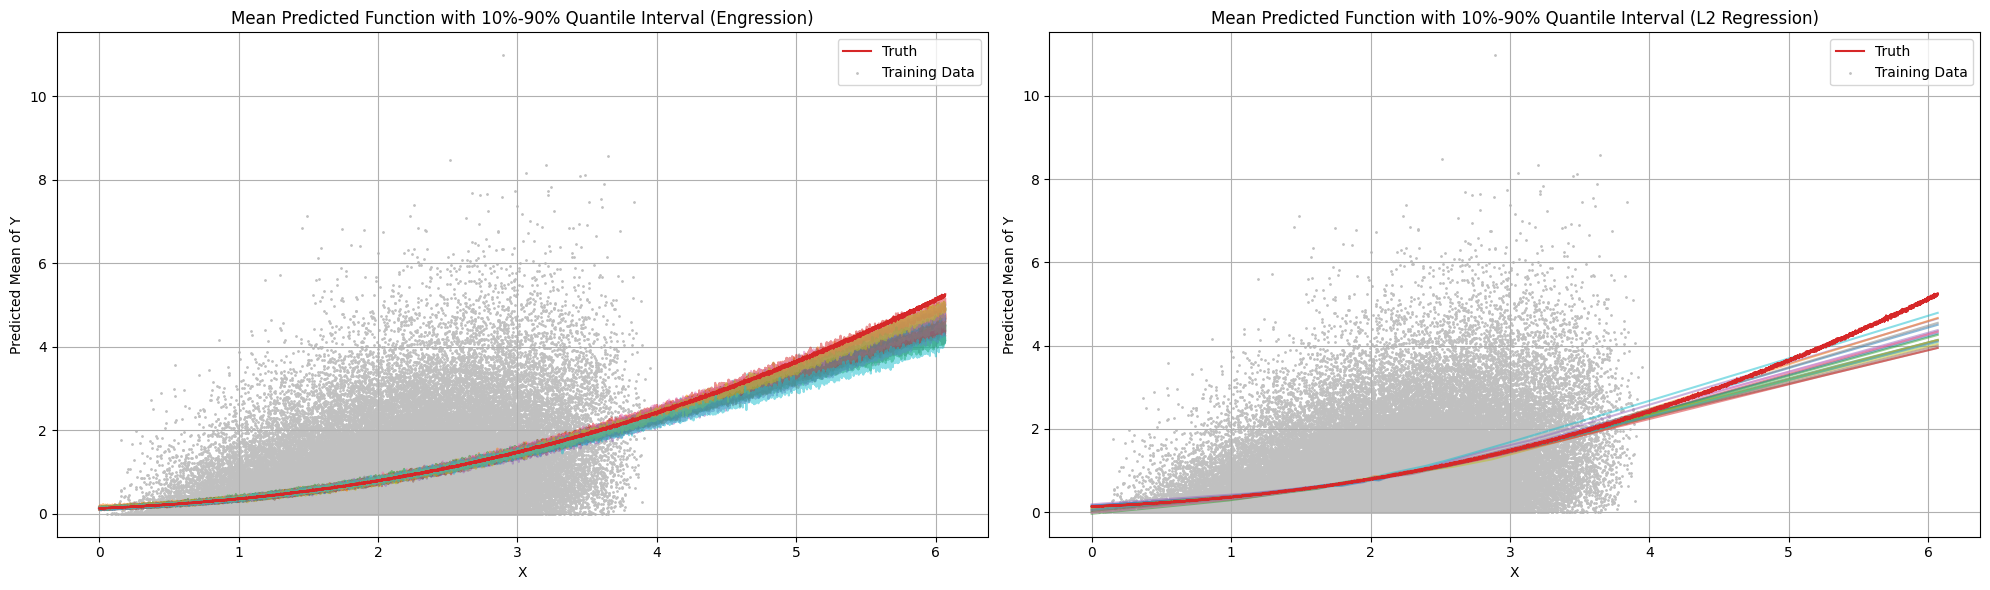

In [9]:
    
fig, axes = plt.subplots(1, 2, figsize=(20, 6))  # Adjust figsize as needed

# First subplot
ax1 = axes[0]
for i in range(20):
    ax1.plot(x_test, predicted_means[i], alpha=0.5)
ax1.plot(x_test, y_true_mean, label='Truth', color='C3')
#ax1.fill_between(x_test, y_mean_lower, y_mean_upper, color='skyblue', alpha=0.5, label='10% - 90% Quantile Interval')
ax1.scatter(x_train, y_train, label="Training Data", s=1, color="silver")
ax1.set_xlabel('X')
ax1.set_ylabel('Predicted Mean of Y')
ax1.set_title('Mean Predicted Function with 10%-90% Quantile Interval (Engression)')
ax1.legend()
ax1.grid(True)

# Second subplot
ax2 = axes[1]
for i in range(20):
    ax2.plot(x_test, predicted_means_L2[i], alpha=0.5)
ax2.plot(x_test_L2, y_true_mean_L2, label='Truth', color='C3')
#ax2.fill_between(x_test_L2, y_lower_L2, y_upper_L2, color='skyblue', alpha=0.5, label='10% - 90% Quantile Interval')
ax2.scatter(x_train_L2, y_train_L2, label="Training Data", s=1, color="silver")
ax2.set_xlabel('X')
ax2.set_ylabel('Predicted Mean of Y')
ax2.set_title('Mean Predicted Function with 10%-90% Quantile Interval (L2 Regression)')
ax2.legend()
ax2.grid(True)

# Adjust layout and display the plots
plt.tight_layout()
plt.show()    

#### 2. Uniform Error 

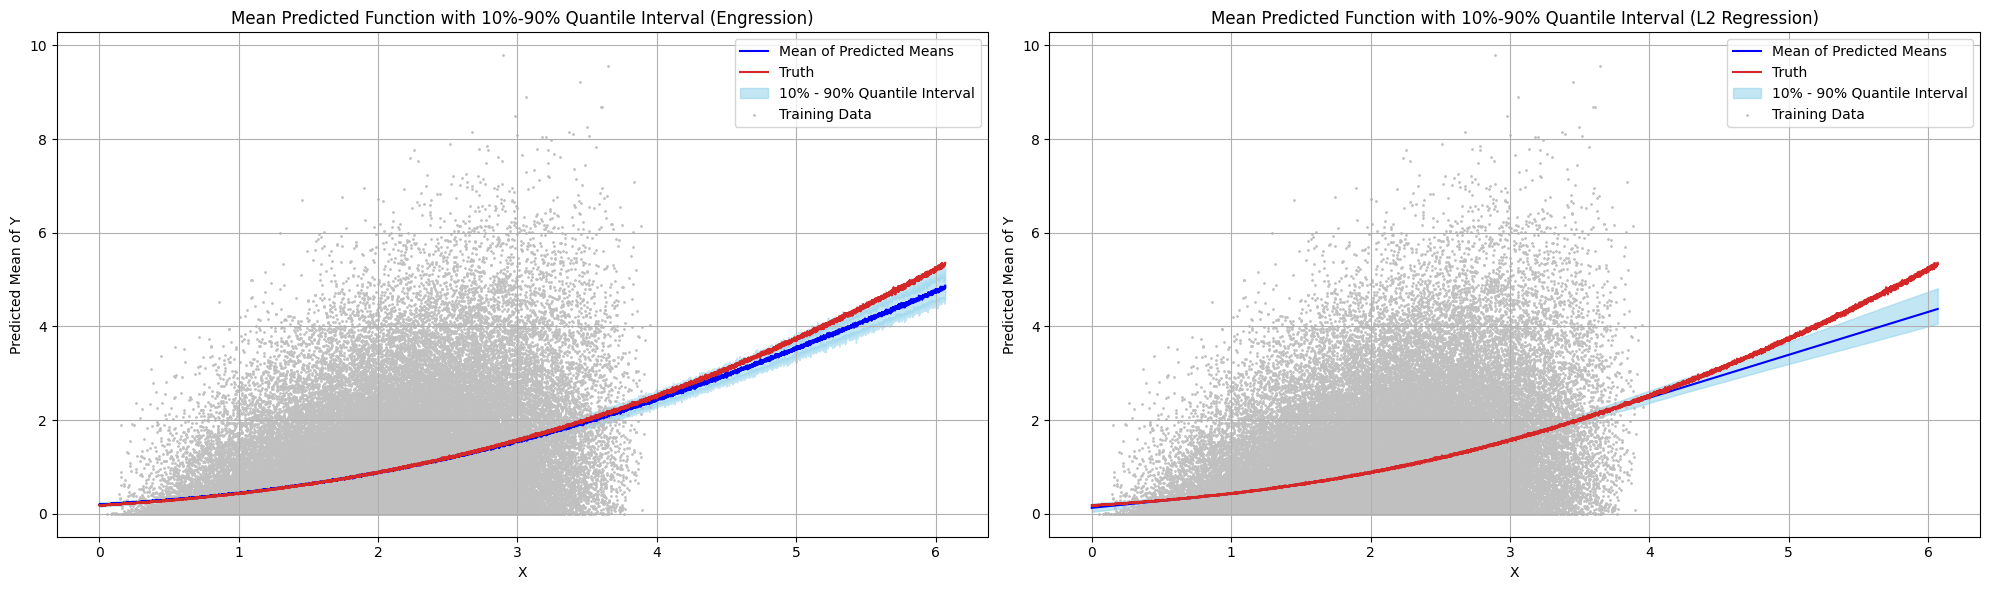

In [10]:
# Access the results
predicted_means = results2['predicted_means']                            
x_train = results2['x_train']
y_train = results2['y_train']
x_test = results2['x_test']   
y_true_mean = results2['y_true_mean']                       

y_mean = predicted_means.mean(axis=0)  
y_mean_lower = np.quantile(predicted_means, 0.10, axis=0)  
y_mean_upper = np.quantile(predicted_means, 0.90, axis=0)  

x_test = np.squeeze(x_test)  

y_mean = np.squeeze(y_mean)
y_mean_lower = np.squeeze(y_mean_lower)
y_mean_upper = np.squeeze(y_mean_upper)



predicted_means_L2 = results2_L2['predicted_means']                        
x_train_L2 = results2_L2['x_train']
y_train_L2 = results2_L2['y_train']
x_test_L2 = results2_L2['x_test']   
y_true_mean_L2 = results2_L2['y_true_mean']                        

y_mean_L2 = predicted_means_L2.mean(axis=0)  
y_lower_L2 = np.quantile(predicted_means_L2, 0.10, axis=0)  
y_upper_L2 = np.quantile(predicted_means_L2, 0.90, axis=0)  

x_test_L2 = np.squeeze(x_test_L2)  

y_mean_L2 = np.squeeze(y_mean_L2)
y_lower_L2 = np.squeeze(y_lower_L2)
y_upper_L2 = np.squeeze(y_upper_L2)

fig, axes = plt.subplots(1, 2, figsize=(20, 6))  # Adjust figsize as needed

# First subplot
ax1 = axes[0]
ax1.plot(x_test, y_mean, label='Mean of Predicted Means', color='blue')
ax1.plot(x_test, y_true_mean, label='Truth', color='C3')
ax1.fill_between(x_test, y_mean_lower, y_mean_upper, color='skyblue', alpha=0.5, label='10% - 90% Quantile Interval')
ax1.scatter(x_train, y_train, label="Training Data", s=1, color="silver")
ax1.set_xlabel('X')
ax1.set_ylabel('Predicted Mean of Y')
ax1.set_title('Mean Predicted Function with 10%-90% Quantile Interval (Engression)')
ax1.legend()
ax1.grid(True)

# Second subplot
ax2 = axes[1]
ax2.plot(x_test_L2, y_mean_L2, label='Mean of Predicted Means', color='blue')
ax2.plot(x_test_L2, y_true_mean_L2, label='Truth', color='C3')
ax2.fill_between(x_test_L2, y_lower_L2, y_upper_L2, color='skyblue', alpha=0.5, label='10% - 90% Quantile Interval')
ax2.scatter(x_train_L2, y_train_L2, label="Training Data", s=1, color="silver")
ax2.set_xlabel('X')
ax2.set_ylabel('Predicted Mean of Y')
ax2.set_title('Mean Predicted Function with 10%-90% Quantile Interval (L2 Regression)')
ax2.legend()
ax2.grid(True)

# Adjust layout and display the plots
plt.tight_layout()
plt.show()


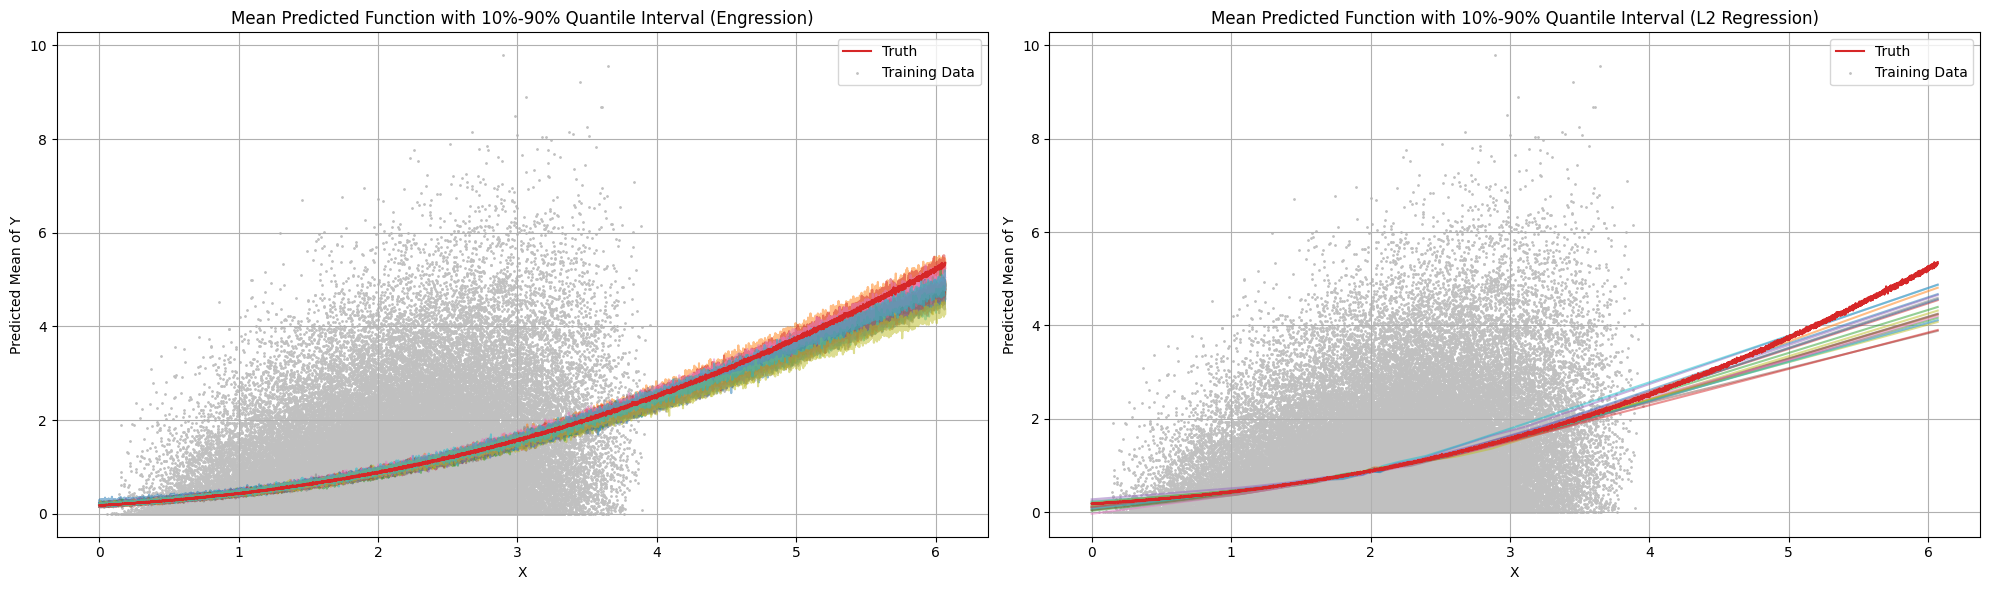

In [11]:
    
fig, axes = plt.subplots(1, 2, figsize=(20, 6))  # Adjust figsize as needed

# First subplot
ax1 = axes[0]
for i in range(20):
    ax1.plot(x_test, predicted_means[i], alpha=0.5)
ax1.plot(x_test, y_true_mean, label='Truth', color='C3')
#ax1.fill_between(x_test, y_mean_lower, y_mean_upper, color='skyblue', alpha=0.5, label='10% - 90% Quantile Interval')
ax1.scatter(x_train, y_train, label="Training Data", s=1, color="silver")
ax1.set_xlabel('X')
ax1.set_ylabel('Predicted Mean of Y')
ax1.set_title('Mean Predicted Function with 10%-90% Quantile Interval (Engression)')
ax1.legend()
ax1.grid(True)

# Second subplot
ax2 = axes[1]
for i in range(20):
    ax2.plot(x_test, predicted_means_L2[i], alpha=0.5)
ax2.plot(x_test_L2, y_true_mean_L2, label='Truth', color='C3')
#ax2.fill_between(x_test_L2, y_lower_L2, y_upper_L2, color='skyblue', alpha=0.5, label='10% - 90% Quantile Interval')
ax2.scatter(x_train_L2, y_train_L2, label="Training Data", s=1, color="silver")
ax2.set_xlabel('X')
ax2.set_ylabel('Predicted Mean of Y')
ax2.set_title('Mean Predicted Function with 10%-90% Quantile Interval (L2 Regression)')
ax2.legend()
ax2.grid(True)

# Adjust layout and display the plots
plt.tight_layout()
plt.show()    